# Regression Predict Student Solution

© Explore Data Science Academy

---
### Honour Code

I {TEAM_GM1_#MODELBULDERS}, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

### Predict Overview: Spain Electricity Shortfall Challenge

The government of Spain is considering an expansion of it's renewable energy resource infrastructure investments. As such, they require information on the trends and patterns of the countries renewable sources and fossil fuel energy generation. Your company has been awarded the contract to:

- 1. analyse the supplied data;
- 2. identify potential errors in the data and clean the existing data set;
- 3. determine if additional features can be added to enrich the data set;
- 4. build a model that is capable of forecasting the three hourly demand shortfalls;
- 5. evaluate the accuracy of the best machine learning model;
- 6. determine what features were most important in the model’s prediction decision, and
- 7. explain the inner working of the model to a non-technical audience.

Formally the problem statement was given to you, the senior data scientist, by your manager via email reads as follow:

> In this project you are tasked to model the shortfall between the energy generated by means of fossil fuels and various renewable sources - for the country of Spain. The daily shortfall, which will be referred to as the target variable, will be modelled as a function of various city-specific weather features such as `pressure`, `wind speed`, `humidity`, etc. As with all data science projects, the provided features are rarely adequate predictors of the target variable. As such, you are required to perform feature engineering to ensure that you will be able to accurately model Spain's three hourly shortfalls.
 
On top of this, she has provided you with a starter notebook containing vague explanations of what the main outcomes are. 

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section you are required to import, and briefly discuss, the libraries that will be used throughout your analysis and modelling. |

---

In [99]:
# Libraries for data loading, data manipulation and data visulisation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Libraries for data preparation and model building
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics 
import math 
from statsmodels.graphics.correlation import plot_corr
import statsmodels.formula.api as sm
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

# Setting global constants to ensure notebook results are reproducible
#PARAMETER_CONSTANT = 0.1 ###

<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section you are required to load the data from the `df_train` file into a DataFrame. |

---

In [100]:
df_train = pd.read_csv('df_train.csv') # load the data
df_train.head()

,Unnamed: 0,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
0,0,2015-01-01 03:00:00,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.0,1.000000,...,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667
1,1,2015-01-01 06:00:00,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.0,1.000000,...,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667
2,2,2015-01-01 09:00:00,1.000000,level_9,0.0,1.000000,71.333333,64.333333,0.0,1.000000,...,272.708667,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667
3,3,2015-01-01 12:00:00,1.000000,level_8,0.0,1.000000,65.333333,56.333333,0.0,1.000000,...,281.895219,283.434104,281.135063,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,5075.666667
4,4,2015-01-01 15:00:00,1.000000,level_7,0.0,1.000000,59.000000,57.000000,2.0,0.333333,...,280.678437,284.213167,282.252063,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,6620.666667


In [101]:
df_test = pd.read_csv('df_test.csv') # load the data
df_test.head()

,Unnamed: 0,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,...,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min
0,8763,2018-01-01 00:00:00,5.000000,level_8,0.0,5.000000,87.000000,71.333333,20.000000,3.000000,...,287.816667,280.816667,287.356667,276.150000,280.380000,286.816667,285.150000,283.150000,279.866667,279.150000
1,8764,2018-01-01 03:00:00,4.666667,level_8,0.0,5.333333,89.000000,78.000000,0.000000,3.666667,...,284.816667,280.483333,284.190000,277.816667,281.010000,283.483333,284.150000,281.150000,279.193333,278.150000
2,8765,2018-01-01 06:00:00,2.333333,level_7,0.0,5.000000,89.000000,89.666667,0.000000,2.333333,...,284.483333,276.483333,283.150000,276.816667,279.196667,281.816667,282.150000,280.483333,276.340000,276.150000
3,8766,2018-01-01 09:00:00,2.666667,level_7,0.0,5.333333,93.333333,82.666667,26.666667,5.666667,...,284.150000,277.150000,283.190000,279.150000,281.740000,282.150000,284.483333,279.150000,275.953333,274.483333
4,8767,2018-01-01 12:00:00,4.000000,level_7,0.0,8.666667,65.333333,64.000000,26.666667,10.666667,...,287.483333,281.150000,286.816667,281.816667,284.116667,286.150000,286.816667,284.483333,280.686667,280.150000


<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
| In this section, you are required to perform an in-depth analysis of all the variables in the DataFrame. |

---


In [102]:
# look at data statistics
df_train.describe()
#testing

,Unnamed: 0,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
count,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,...,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000
mean,4381.000000,2.425729,0.135753,2.586272,62.658793,57.414717,43.469132,1.850356,13.714748,158.957511,...,289.540309,289.855459,285.017973,286.422929,288.447422,287.966027,291.633356,288.419439,287.202203,10673.857612
std,2529.804538,1.850371,0.374901,2.411190,22.621226,24.335396,32.551044,1.695888,24.272482,102.056299,...,9.752047,6.528111,6.705672,6.818682,6.102593,7.105590,8.178220,9.346796,9.206237,5218.046404
min,0.000000,0.000000,0.000000,0.000000,8.333333,6.333333,0.000000,0.000000,0.000000,0.000000,...,264.983333,270.816667,264.483333,267.483333,269.483333,269.063000,270.150000,264.983333,264.983333,-6618.000000
25%,2190.500000,1.000000,0.000000,1.000000,44.333333,36.333333,10.000000,0.666667,0.000000,73.333333,...,282.150000,284.973443,280.085167,281.374167,284.150000,282.836776,285.816667,281.404281,280.299167,7390.333333
50%,4381.000000,2.000000,0.000000,1.666667,65.666667,58.000000,45.000000,1.000000,0.000000,147.000000,...,288.116177,289.416667,284.816667,286.158333,288.150000,287.630000,290.816667,287.053333,286.083333,11114.666667
75%,6571.500000,3.333333,0.100000,3.666667,82.000000,78.666667,75.000000,2.666667,20.000000,234.000000,...,296.816667,294.909000,289.816667,291.034167,292.966667,292.483333,297.150000,295.154667,293.884500,14498.166667
max,8762.000000,13.000000,3.000000,52.000000,100.000000,100.000000,100.000000,12.666667,97.333333,359.333333,...,314.483333,307.316667,309.816667,310.710000,304.816667,317.966667,314.816667,313.133333,310.383333,31904.000000


In [103]:
df_train.shape

(8763, 49)

In [104]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 49 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            8763 non-null   int64  
 1   time                  8763 non-null   object 
 2   Madrid_wind_speed     8763 non-null   float64
 3   Valencia_wind_deg     8763 non-null   object 
 4   Bilbao_rain_1h        8763 non-null   float64
 5   Valencia_wind_speed   8763 non-null   float64
 6   Seville_humidity      8763 non-null   float64
 7   Madrid_humidity       8763 non-null   float64
 8   Bilbao_clouds_all     8763 non-null   float64
 9   Bilbao_wind_speed     8763 non-null   float64
 10  Seville_clouds_all    8763 non-null   float64
 11  Bilbao_wind_deg       8763 non-null   float64
 12  Barcelona_wind_speed  8763 non-null   float64
 13  Barcelona_wind_deg    8763 non-null   float64
 14  Madrid_clouds_all     8763 non-null   float64
 15  Seville_wind_speed   

In [105]:
df_train.isnull().sum()

Unnamed: 0                 0
time                       0
Madrid_wind_speed          0
Valencia_wind_deg          0
Bilbao_rain_1h             0
Valencia_wind_speed        0
Seville_humidity           0
Madrid_humidity            0
Bilbao_clouds_all          0
Bilbao_wind_speed          0
Seville_clouds_all         0
Bilbao_wind_deg            0
Barcelona_wind_speed       0
Barcelona_wind_deg         0
Madrid_clouds_all          0
Seville_wind_speed         0
Barcelona_rain_1h          0
Seville_pressure           0
Seville_rain_1h            0
Bilbao_snow_3h             0
Barcelona_pressure         0
Seville_rain_3h            0
Madrid_rain_1h             0
Barcelona_rain_3h          0
Valencia_snow_3h           0
Madrid_weather_id          0
Barcelona_weather_id       0
Bilbao_pressure            0
Seville_weather_id         0
Valencia_pressure       2068
Seville_temp_max           0
Madrid_pressure            0
Valencia_temp_max          0
Valencia_temp              0
Bilbao_weather

In [106]:
df_train.duplicated().sum()

0

# Exploring the categorical features

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'level_5'),
  Text(1, 0, 'level_10'),
  Text(2, 0, 'level_9'),
  Text(3, 0, 'level_8'),
  Text(4, 0, 'level_7'),
  Text(5, 0, 'level_6'),
  Text(6, 0, 'level_4'),
  Text(7, 0, 'level_3'),
  Text(8, 0, 'level_1'),
  Text(9, 0, 'level_2')])

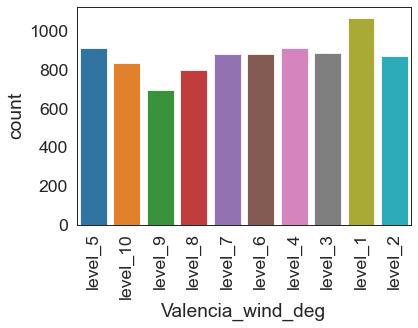

In [107]:
sns.countplot(x='Valencia_wind_deg', data=df_train)
plt.xticks(rotation=90)

In [108]:
df_train['Seville_pressure'].unique()

array(['sp25', 'sp23', 'sp24', 'sp21', 'sp16', 'sp9', 'sp15', 'sp19',
       'sp22', 'sp11', 'sp8', 'sp4', 'sp6', 'sp13', 'sp17', 'sp20',
       'sp18', 'sp14', 'sp12', 'sp5', 'sp10', 'sp7', 'sp3', 'sp2', 'sp1'],
      dtype=object)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 [Text(0, 0, 'sp25'),
  Text(1, 0, 'sp23'),
  Text(2, 0, 'sp24'),
  Text(3, 0, 'sp21'),
  Text(4, 0, 'sp16'),
  Text(5, 0, 'sp9'),
  Text(6, 0, 'sp15'),
  Text(7, 0, 'sp19'),
  Text(8, 0, 'sp22'),
  Text(9, 0, 'sp11'),
  Text(10, 0, 'sp8'),
  Text(11, 0, 'sp4'),
  Text(12, 0, 'sp6'),
  Text(13, 0, 'sp13'),
  Text(14, 0, 'sp17'),
  Text(15, 0, 'sp20'),
  Text(16, 0, 'sp18'),
  Text(17, 0, 'sp14'),
  Text(18, 0, 'sp12'),
  Text(19, 0, 'sp5'),
  Text(20, 0, 'sp10'),
  Text(21, 0, 'sp7'),
  Text(22, 0, 'sp3'),
  Text(23, 0, 'sp2'),
  Text(24, 0, 'sp1')])

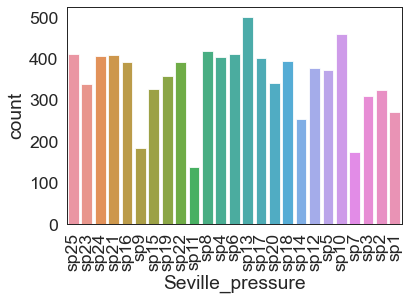

In [109]:
sns.countplot(x='Seville_pressure', data=df_train)
plt.xticks(rotation=90)

# plotting relevant feature interactions

<function matplotlib.pyplot.show(close=None, block=None)>

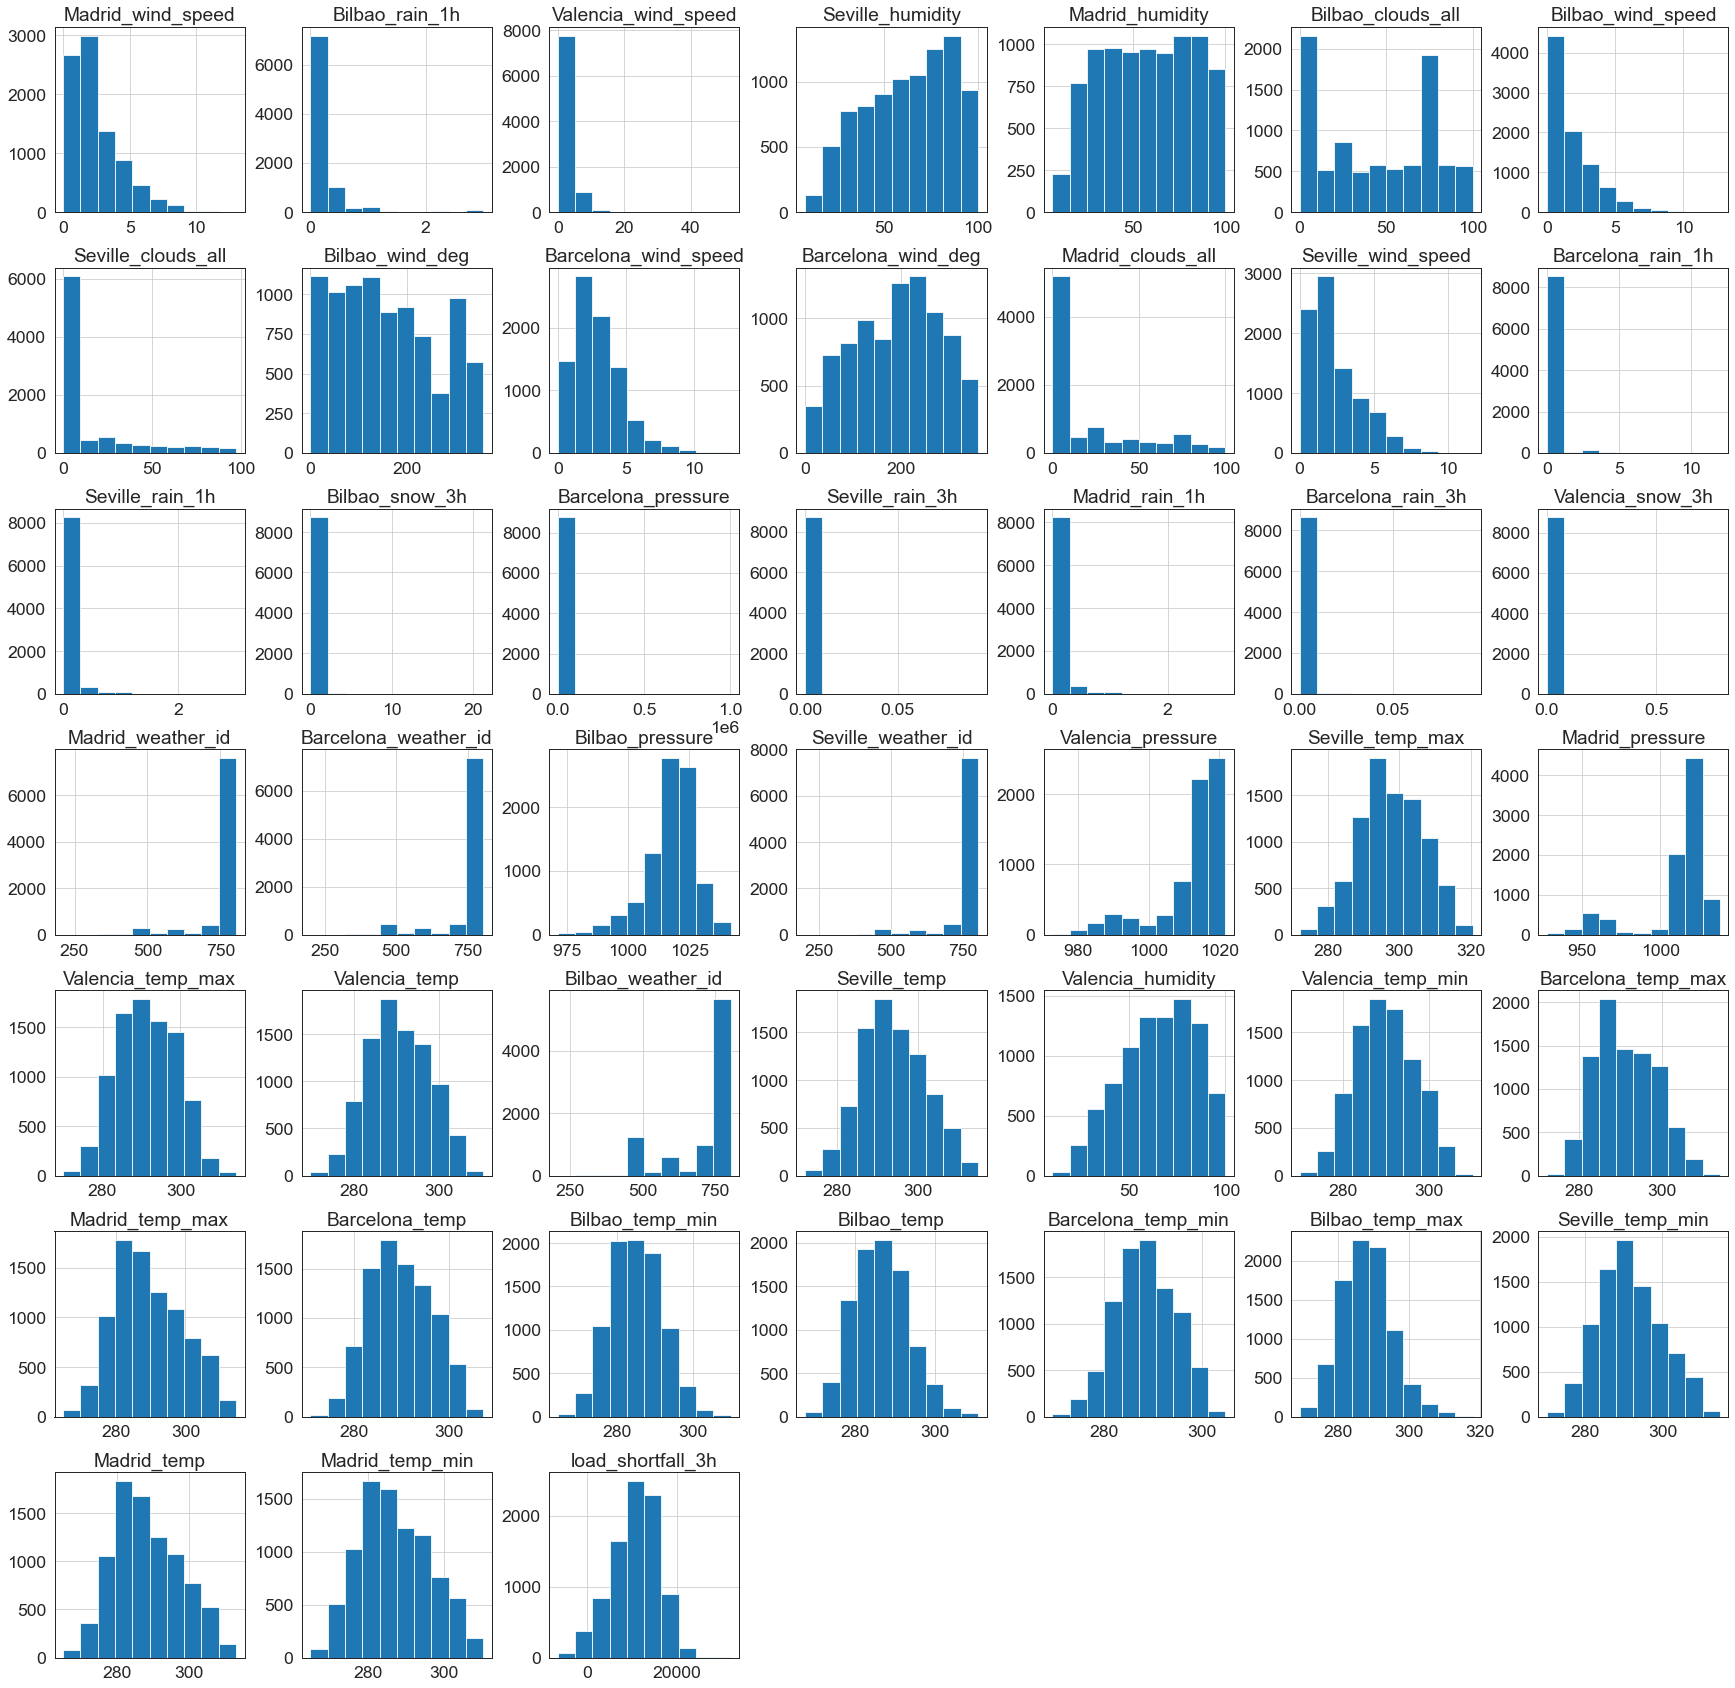

In [110]:
df_train = df_train.drop(columns=['Unnamed: 0'])
df_train.hist(figsize=(30,30)) 
plt.show

# Checking for Outliers

In [111]:
df_train.kurtosis()

Madrid_wind_speed          2.036462
Bilbao_rain_1h            32.904656
Valencia_wind_speed       35.645426
Seville_humidity          -1.017983
Madrid_humidity           -1.167537
Bilbao_clouds_all         -1.533417
Bilbao_wind_speed          3.631565
Seville_clouds_all         2.155921
Bilbao_wind_deg           -1.083530
Barcelona_wind_speed       1.493635
Barcelona_wind_deg        -0.959160
Madrid_clouds_all          0.142079
Seville_wind_speed         1.398580
Barcelona_rain_1h        101.578931
Seville_rain_1h           93.840746
Bilbao_snow_3h           806.128471
Barcelona_pressure      3687.564230
Seville_rain_3h          413.136592
Madrid_rain_1h            76.584491
Barcelona_rain_3h        187.800460
Valencia_snow_3h        4089.323165
Madrid_weather_id          9.259047
Barcelona_weather_id       5.701882
Bilbao_pressure            1.825323
Seville_weather_id        10.710308
Valencia_pressure          2.211823
Seville_temp_max          -0.515989
Madrid_pressure            2

Bilbao_rain_1h,
Valencia_wind_speed,
Bilbao_wind_speed,
Barcelona_rain_1h,
Seville_rain_1h,           
Bilbao_snow_3h,         
Barcelona_pressure,     
Seville_rain_3h,          
Madrid_rain_1h ,          
Barcelona_rain_3h ,      
Valencia_snow_3h ,    
Madrid_weather_id ,      
Barcelona_weather_id,
Seville_weather_id ,       
THE FOLLOWING FEATURES CONTAINS OUTLIERS

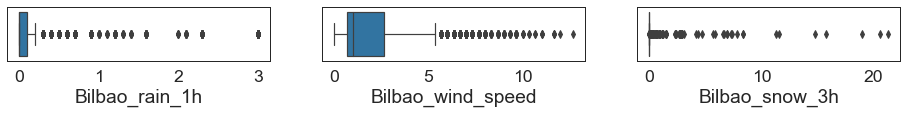

In [112]:
plt.figure(figsize=(16,1))
plt.subplot(1,3,1)
sns.boxplot(df_train['Bilbao_rain_1h'])
plt.subplot(1,3,2)
sns.boxplot(df_train['Bilbao_wind_speed'])
plt.subplot(1,3,3)
sns.boxplot(df_train['Bilbao_snow_3h'])
plt.show()

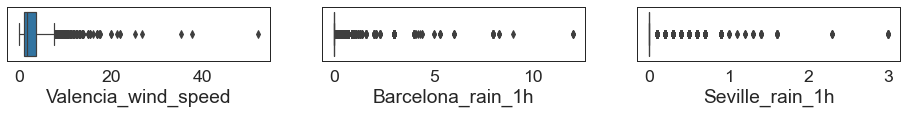

In [113]:
plt.figure(figsize=(16,1))
plt.subplot(1,3,1)
sns.boxplot(df_train['Valencia_wind_speed'])
plt.subplot(1,3,2)
sns.boxplot(df_train['Barcelona_rain_1h'])
plt.subplot(1,3,3)
sns.boxplot(df_train['Seville_rain_1h'])
plt.show()

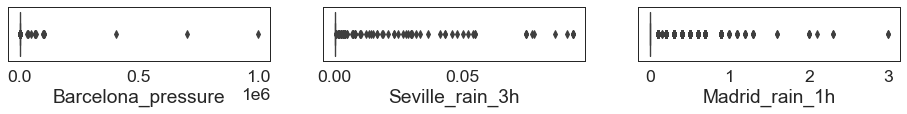

In [114]:
plt.figure(figsize=(16,1))
plt.subplot(1,3,1)
sns.boxplot(df_train['Barcelona_pressure'])
plt.subplot(1,3,2)
sns.boxplot(df_train['Seville_rain_3h'])
plt.subplot(1,3,3)
sns.boxplot(df_train['Madrid_rain_1h'])
plt.show()

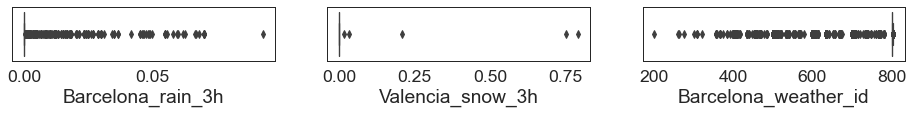

In [115]:
plt.figure(figsize=(16,1))
plt.subplot(1,3,1)
sns.boxplot(df_train['Barcelona_rain_3h'])
plt.subplot(1,3,2)
sns.boxplot(df_train['Valencia_snow_3h'])
plt.subplot(1,3,3)
sns.boxplot(df_train['Barcelona_weather_id'])
plt.show()

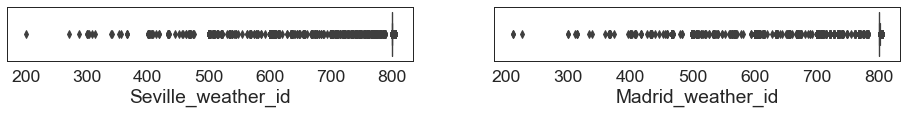

In [116]:
plt.figure(figsize=(16,1))
plt.subplot(1,2,1)
sns.boxplot(df_train['Seville_weather_id'])
plt.subplot(1,2,2)
sns.boxplot(df_train['Madrid_weather_id'])
plt.show()

# Correlation

In [117]:
df_train.corr().head()

,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
Madrid_wind_speed,1.000000,0.259719,0.513092,-0.117892,-0.137092,0.244001,0.377854,0.191251,0.270950,0.294640,...,0.091464,0.080133,0.077330,0.060467,0.089992,0.042114,0.110278,0.109572,0.098138,-0.150981
Bilbao_rain_1h,0.259719,1.000000,0.265864,0.069878,0.106765,0.370733,0.085398,0.081131,0.279350,0.069997,...,-0.148397,-0.138901,-0.141269,-0.182494,-0.106593,-0.219871,-0.120575,-0.135927,-0.116431,-0.152510
Valencia_wind_speed,0.513092,0.265864,1.000000,-0.075227,-0.019388,0.210524,0.386478,0.163675,0.248643,0.347966,...,-0.021970,-0.021456,-0.010166,-0.022676,0.001413,-0.033271,0.003618,-0.011982,-0.019742,-0.142791
Seville_humidity,-0.117892,0.069878,-0.075227,1.000000,0.799831,0.061680,-0.088180,0.399436,-0.087246,-0.138625,...,-0.708937,-0.617797,-0.605493,-0.604733,-0.595065,-0.583718,-0.784850,-0.717171,-0.688664,-0.167290
Madrid_humidity,-0.137092,0.106765,-0.019388,0.799831,1.000000,0.041878,-0.016808,0.374112,-0.069570,-0.058518,...,-0.803260,-0.684867,-0.635760,-0.634825,-0.636777,-0.611395,-0.769591,-0.802605,-0.759633,-0.150536


<AxesSubplot:>

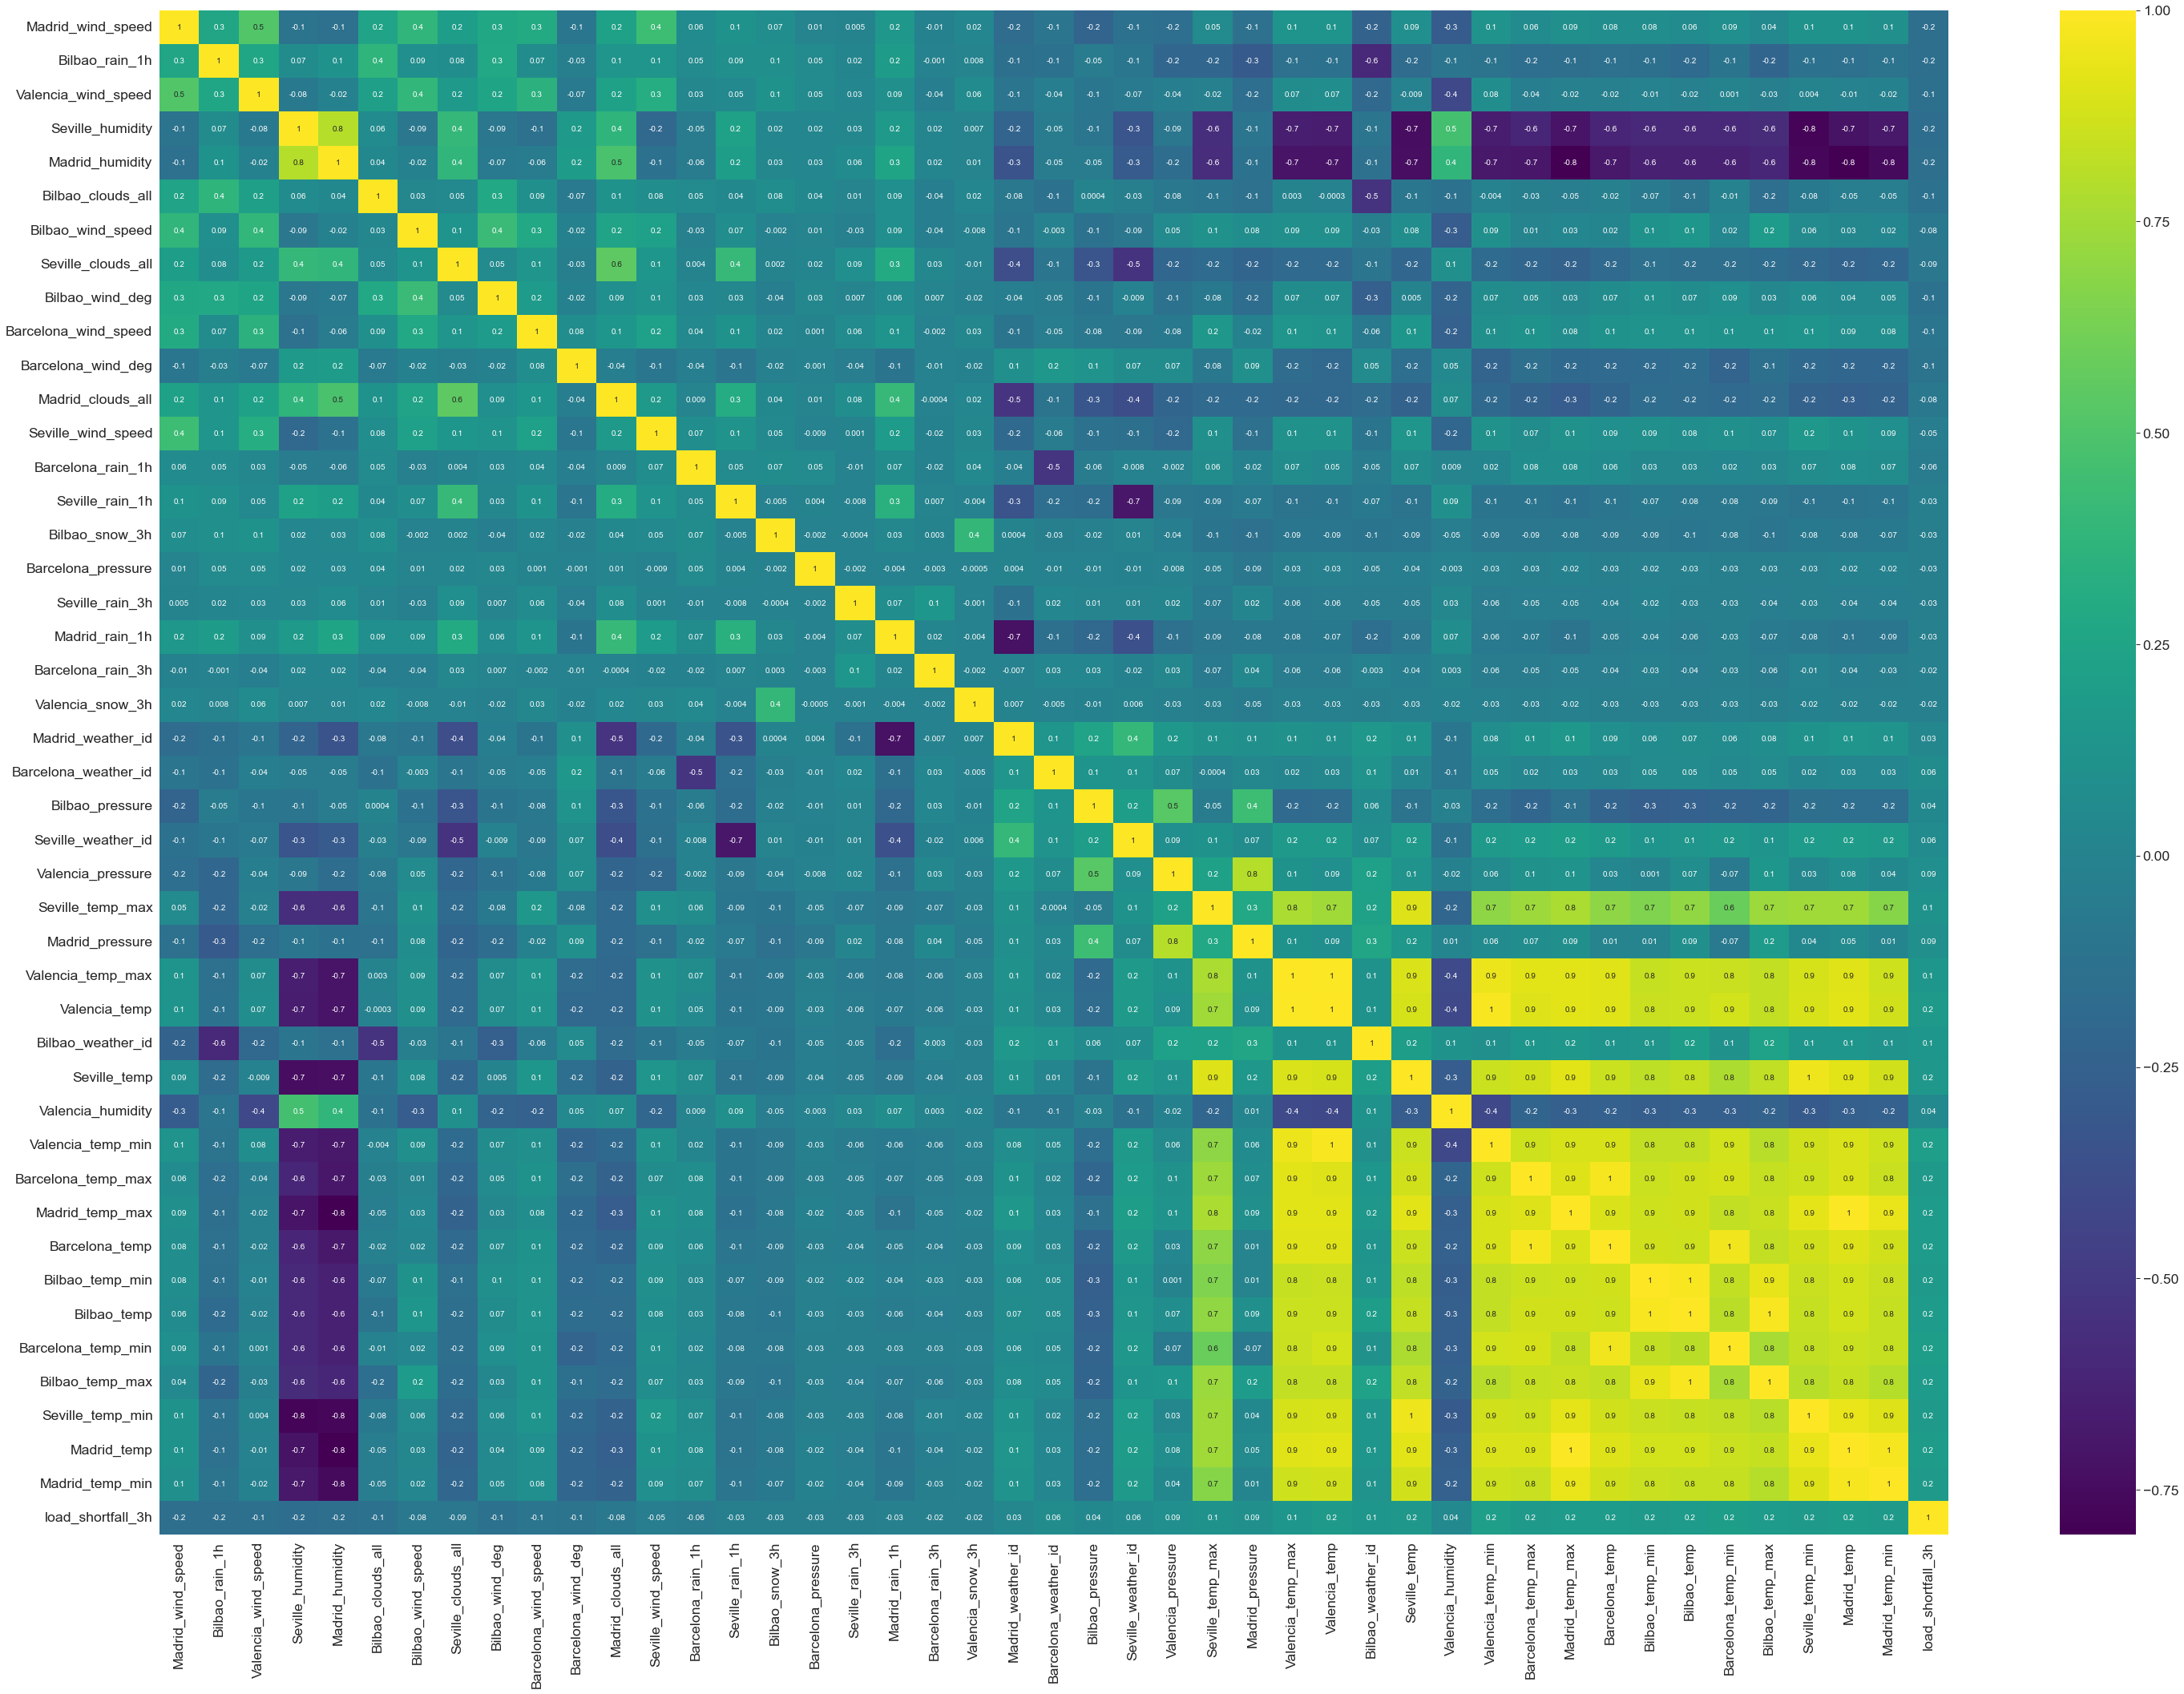

In [118]:
# evaluate correlation
plt.figure(figsize=(50,35))
corr = df_train.corr()
sns.heatmap(corr, annot=True, cmap="viridis", fmt='.1g')


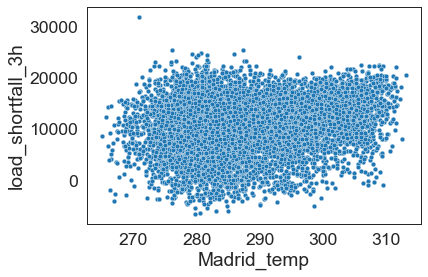

In [119]:
sns.scatterplot(x='Madrid_temp',y='load_shortfall_3h', data=df_train);

correlation **

In [120]:
# Feature Distributions

In [121]:
df_train.skew()

Madrid_wind_speed        1.441144
Bilbao_rain_1h           5.222802
Valencia_wind_speed      3.499637
Seville_humidity        -0.310175
Madrid_humidity         -0.057378
Bilbao_clouds_all       -0.053085
Bilbao_wind_speed        1.716914
Seville_clouds_all       1.814452
Bilbao_wind_deg          0.226927
Barcelona_wind_speed     1.057331
Barcelona_wind_deg      -0.180001
Madrid_clouds_all        1.246745
Seville_wind_speed       1.151006
Barcelona_rain_1h        8.726988
Seville_rain_1h          8.067341
Bilbao_snow_3h          26.177568
Barcelona_pressure      57.979664
Seville_rain_3h         19.342574
Madrid_rain_1h           7.074308
Barcelona_rain_3h       12.696605
Valencia_snow_3h        63.298084
Madrid_weather_id       -3.107722
Barcelona_weather_id    -2.584011
Bilbao_pressure         -0.999642
Seville_weather_id      -3.275574
Valencia_pressure       -1.705162
Seville_temp_max        -0.033931
Madrid_pressure         -1.850768
Valencia_temp_max        0.082672
Valencia_temp 

#They highlighted a symmetrical distribution since their skew level is above 1
Madrid_wind_speed        
Bilbao_rain_1h           
Valencia_wind_speed
Bilbao_wind_speed        
Seville_clouds_all
Barcelona_wind_speed
Madrid_clouds_all       
Seville_wind_speed      
Barcelona_rain_1h        
Seville_rain_1h          
Bilbao_snow_3h          
Barcelona_pressure     
Seville_rain_3h        
Madrid_rain_1h          
Barcelona_rain_3h       
Valencia_snow_3h       
Madrid_weather_id      
Barcelona_weather_id    
Seville_weather_id     
Valencia_pressure      
Madrid_pressure         
Bilbao_weather_id   



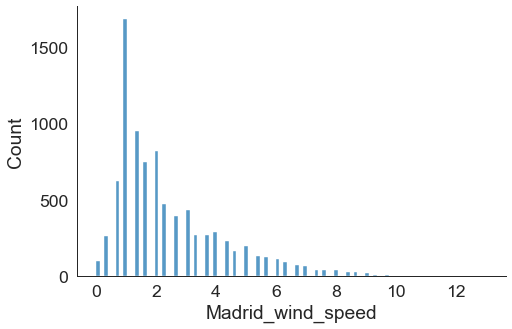

In [122]:
# have a look at feature distributions
sns.set_style('white')
sns.set_context("paper", font_scale = 2)
sns.displot(data=df_train, x="Madrid_wind_speed", kind="hist", bins = 100, aspect = 1.5)

<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data engineering ⚡ |
| :--------------------------- |
| In this section you are required to: clean the dataset, and possibly create new features - as identified in the EDA phase. |

---

# Handling missing values

In [123]:
# remove missing values
df_new = df_train
df_new['Valencia_pressure'].fillna(df_new['Valencia_pressure'].mean(), inplace = True)

In [124]:
df_new['time'] = pd.to_datetime(df_new['time'])

In [125]:

df_new["Valencia_wind_deg"] = df_new['Valencia_wind_deg'].str.extract('(\d+)')
df_new['Valencia_wind_deg'] = pd.to_numeric(df_new['Valencia_wind_deg'])

In [126]:
df_new["Seville_pressure"] = df_new['Seville_pressure'].str.extract('(\d+)')
df_new['Seville_pressure'] = pd.to_numeric(df_new['Seville_pressure'])

# Creating New features

In [127]:
# create new features
# create/engineer new features
df_train['Year']  = df_train['time'].astype('datetime64').dt.year
df_train['Month_of_year']  = df_train['time'].astype('datetime64').dt.month
df_train['Week_of_year'] = df_train['time'].astype('datetime64').dt.weekofyear
df_train['Day_of_year']  = df_train['time'].astype('datetime64').dt.dayofyear
df_train['Day_of_month']  = df_train['time'].astype('datetime64').dt.day
df_train['Day_of_week'] = df_train['time'].astype('datetime64').dt.dayofweek
df_train['Hour_of_week'] = ((df_train['time'].astype('datetime64').dt.dayofweek) * 24 + 24) - (24 - df_train['time'].astype('datetime64').dt.hour)
df_train['Hour_of_day']  = df_train['time'].astype('datetime64').dt.hour

<AxesSubplot:>

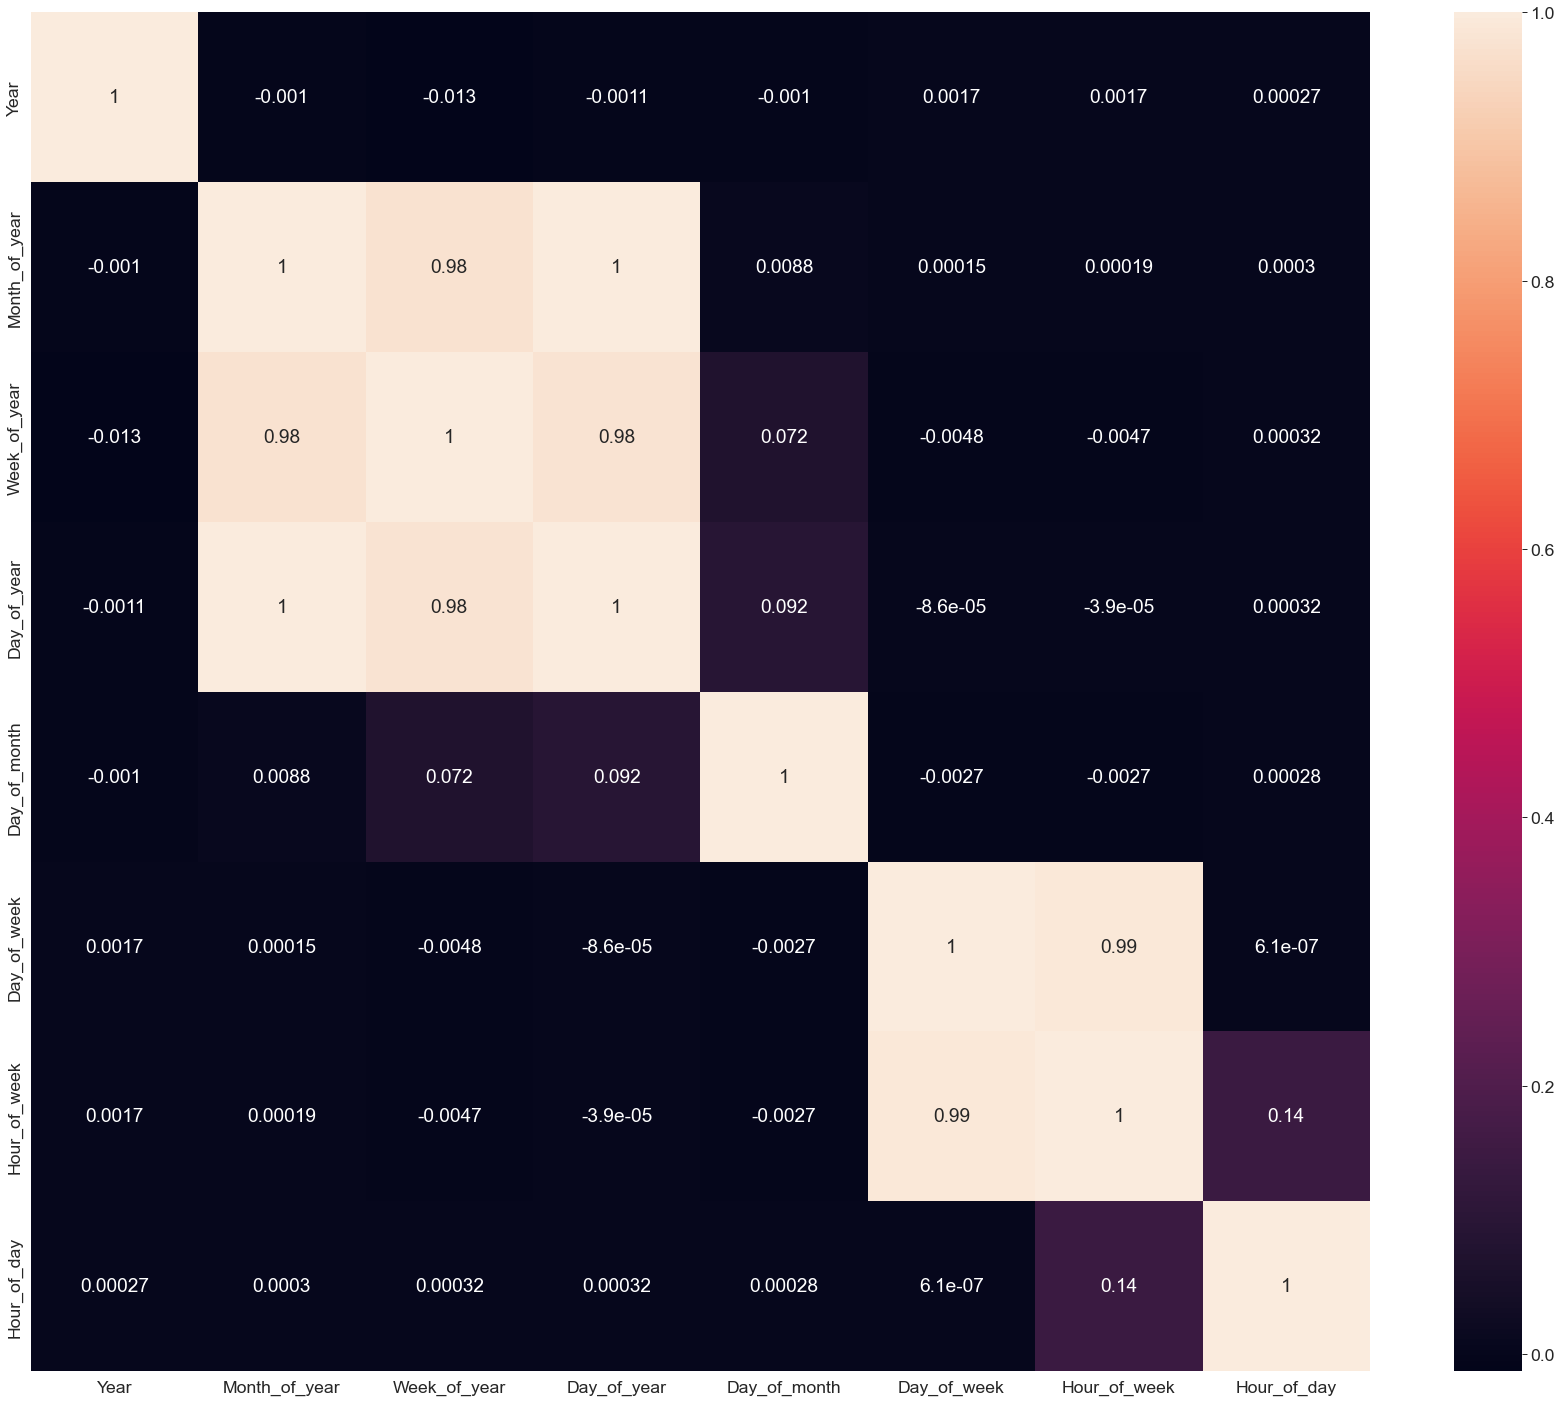

In [128]:
df_train_Time = df_train.iloc[:,[-8,-7,-6,-5,-4,-3,-2,-1]]
plt.figure(figsize=[30,25])
sns.heatmap(df_train_Time.corr(),annot=True)

In [129]:
df_train = df_train.drop(columns=['Week_of_year','Day_of_year','Hour_of_week'])

In [130]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 53 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   time                  8763 non-null   datetime64[ns]
 1   Madrid_wind_speed     8763 non-null   float64       
 2   Valencia_wind_deg     8763 non-null   int64         
 3   Bilbao_rain_1h        8763 non-null   float64       
 4   Valencia_wind_speed   8763 non-null   float64       
 5   Seville_humidity      8763 non-null   float64       
 6   Madrid_humidity       8763 non-null   float64       
 7   Bilbao_clouds_all     8763 non-null   float64       
 8   Bilbao_wind_speed     8763 non-null   float64       
 9   Seville_clouds_all    8763 non-null   float64       
 10  Bilbao_wind_deg       8763 non-null   float64       
 11  Barcelona_wind_speed  8763 non-null   float64       
 12  Barcelona_wind_deg    8763 non-null   float64       
 13  Madrid_clouds_all 

In [131]:
df_train =df_train.drop(columns= 'time')

# Data scaling

In [132]:
X = df_train.drop('load_shortfall_3h', axis=1)
y = df_train['load_shortfall_3h']

In [133]:
# create scaler object
scaler = StandardScaler()

In [134]:
# Save standardized features into new variable
#We used a fit transform method, which first fits in the standardscaler and then transforms the data
X_scaled = scaler.fit_transform(X)

X_scaled = pd.DataFrame(X_scaled,columns=X.columns)
X_scaled.head()

,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,...,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,Year,Month_of_year,Day_of_month,Day_of_week,Hour_of_day
0,-0.950708,-0.096053,-0.362123,-0.796169,0.516117,0.270621,-1.335491,-0.501451,-0.565065,0.630823,...,-1.218309,-2.621665,-2.125118,-2.405393,-2.309892,-1.226179,-1.602429,-1.675368,-0.00274,-1.090901
1,-1.130863,1.641580,-0.362123,-0.381412,0.692953,0.298017,-1.335491,-0.501451,-0.565065,0.607959,...,-1.292271,-2.475661,-2.040702,-2.357388,-2.261154,-1.226179,-1.602429,-1.675368,-0.00274,-0.654451
2,-0.770554,1.294054,-0.362123,-0.657917,0.383491,0.284319,-1.335491,-0.501451,-0.565065,0.542632,...,-1.124792,-1.821036,-1.570279,-1.680968,-1.574407,-1.226179,-1.602429,-1.675368,-0.00274,-0.218001
3,-0.770554,0.946527,-0.362123,-0.657917,0.118238,-0.044439,-1.335491,-0.501451,-0.565065,0.398912,...,-0.821553,-0.961406,-0.762967,-0.698057,-0.576488,-1.226179,-1.602429,-1.675368,-0.00274,0.218449
4,-0.770554,0.599000,-0.362123,-0.657917,-0.161751,-0.017043,-1.274045,-0.894581,-0.565065,0.255192,...,-0.693885,-0.804197,-0.748327,-0.828246,-0.708665,-1.226179,-1.602429,-1.675368,-0.00274,0.654899


In [135]:
y.head()

0    6715.666667
1    4171.666667
2    4274.666667
3    5075.666667
4    6620.666667
Name: load_shortfall_3h, dtype: float64

In [136]:
#Furthermore, the variance within each variable in the data is now equal to one.
X_scaled.describe().loc['std']

Madrid_wind_speed       1.000057
Valencia_wind_deg       1.000057
Bilbao_rain_1h          1.000057
Valencia_wind_speed     1.000057
Seville_humidity        1.000057
Madrid_humidity         1.000057
Bilbao_clouds_all       1.000057
Bilbao_wind_speed       1.000057
Seville_clouds_all      1.000057
Bilbao_wind_deg         1.000057
Barcelona_wind_speed    1.000057
Barcelona_wind_deg      1.000057
Madrid_clouds_all       1.000057
Seville_wind_speed      1.000057
Barcelona_rain_1h       1.000057
Seville_pressure        1.000057
Seville_rain_1h         1.000057
Bilbao_snow_3h          1.000057
Barcelona_pressure      1.000057
Seville_rain_3h         1.000057
Madrid_rain_1h          1.000057
Barcelona_rain_3h       1.000057
Valencia_snow_3h        1.000057
Madrid_weather_id       1.000057
Barcelona_weather_id    1.000057
Bilbao_pressure         1.000057
Seville_weather_id      1.000057
Valencia_pressure       1.000057
Seville_temp_max        1.000057
Madrid_pressure         1.000057
Valencia_t

In [137]:
# engineer existing features

<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section, you are required to create one or more regression models that are able to accurately predict the thee hour load shortfall. |

---

In [138]:
# split predictors and response
X = df_train.drop(['load_shortfall_3h'], axis=1)
y = df_train['load_shortfall_3h']

In [139]:
#Split data
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.5,
                                                    random_state=1)

In [140]:
#checking the shape of the training and testing data

print('Training predictor:', X_train.shape)
print('Training target:', y_train.shape)
print('Testing predictor:', X_test.shape)
print('Testing target:', y_test.shape)

Training predictor: (4381, 51)
Training target: (4381,)
Testing predictor: (4382, 51)
Testing target: (4382,)


In [141]:
y.head()

0    6715.666667
1    4171.666667
2    4274.666667
3    5075.666667
4    6620.666667
Name: load_shortfall_3h, dtype: float64

# Creating Machine Learning models

# 1. Multiple linear regression model

In [142]:
# create model object
lin_reg = LinearRegression()

In [143]:
#Instantiate the model
lin_reg.fit(X_train,y_train)
preds = lin_reg.predict(X_test)

In [144]:
y_train

3619     6980.666667
7666    16651.666667
8045     8460.333333
5477    12869.333333
8213    11516.333333
            ...     
2895    12695.666667
7813     5846.333333
905     13364.666667
5192    15042.333333
235      5060.000000
Name: load_shortfall_3h, Length: 4381, dtype: float64

In [145]:
X_test

,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,...,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,Year,Month_of_year,Day_of_month,Day_of_week,Hour_of_day
7441,6.666667,3,0.0,5.000000,32.333333,14.666667,38.333333,2.666667,0.000000,120.000000,...,300.816667,298.483333,304.483333,304.536667,301.816667,2017,7,19,2,18
6355,5.000000,8,0.1,5.000000,97.666667,83.000000,80.000000,1.333333,52.666667,103.333333,...,283.816667,286.483333,287.150000,284.453333,284.150000,2017,3,6,0,0
1271,2.000000,1,0.0,2.000000,36.000000,27.000000,49.666667,1.000000,0.000000,176.000000,...,295.740000,292.094000,300.816667,302.346667,301.183333,2015,6,9,1,12
3511,1.333333,4,0.0,2.000000,53.333333,37.000000,0.000000,2.333333,20.000000,75.000000,...,286.150000,285.446667,290.946667,285.010000,284.436667,2016,3,15,1,12
1821,1.333333,4,0.1,0.666667,82.666667,49.000000,52.000000,0.666667,0.000000,7.000000,...,289.446667,289.040000,293.483333,294.303333,293.150000,2015,8,17,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2313,1.666667,3,0.0,3.000000,86.000000,83.000000,2.333333,2.000000,51.666667,131.666667,...,291.003333,291.003823,293.150000,291.856667,291.483333,2015,10,17,5,18
3808,4.000000,4,0.0,3.333333,48.000000,54.333333,75.000000,4.000000,26.666667,323.333333,...,290.150000,288.816667,292.816667,288.980000,288.483333,2016,4,21,3,15
5563,1.666667,6,0.1,1.000000,91.000000,91.000000,48.000000,2.666667,38.333333,120.000000,...,285.483333,283.816667,283.150000,282.863333,282.483333,2016,11,27,6,0
919,5.000000,8,0.5,5.666667,92.000000,95.333333,75.666667,2.000000,42.000000,226.333333,...,290.762500,289.792167,290.645833,285.104167,285.104167,2015,4,26,6,12


In [146]:
preds

array([13665.63874875,  8885.2040304 , 11839.81305615, ...,
       10116.2096966 ,  7003.55257702, 10043.86214078])

In [147]:
X_train

,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,...,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,Year,Month_of_year,Day_of_month,Day_of_week,Hour_of_day
3619,2.000000,9,0.1,2.333333,82.333333,81.000000,64.333333,1.333333,0.000000,150.666667,...,287.816667,284.166833,287.356833,283.553333,283.223333,2016,3,29,1,0
7666,2.000000,2,0.0,2.000000,25.333333,17.666667,0.000000,1.333333,0.000000,214.666667,...,298.150000,294.483333,305.150000,304.806667,302.816667,2017,8,16,2,21
8045,0.333333,6,0.0,1.333333,69.333333,77.333333,85.000000,0.666667,0.000000,36.666667,...,291.483333,291.150000,290.816667,288.523333,287.816667,2017,10,3,1,6
5477,1.333333,10,0.0,5.666667,80.000000,82.666667,6.666667,1.666667,0.000000,103.333333,...,276.816667,278.150000,280.483333,274.226667,273.816667,2016,11,16,2,6
8213,1.333333,6,0.0,1.333333,84.000000,74.000000,0.000000,1.000000,0.000000,100.000000,...,284.150000,282.150000,288.816667,281.330000,280.483333,2017,10,24,1,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2895,0.000000,8,0.0,4.666667,77.333333,93.333333,20.000000,2.333333,6.666667,160.000000,...,285.373333,291.480000,288.150000,281.626667,281.003333,2015,12,29,1,12
7813,2.000000,5,0.1,0.666667,80.333333,45.666667,75.000000,0.000000,0.000000,0.000000,...,293.150000,291.150000,292.816667,291.046667,290.483333,2017,9,4,0,6
905,3.666667,5,0.1,1.333333,46.000000,37.333333,92.000000,1.000000,45.333333,238.000000,...,289.772167,290.479010,293.180500,292.813833,292.813833,2015,4,24,4,18
5192,4.000000,7,0.0,1.666667,46.666667,38.333333,53.333333,1.000000,0.000000,65.333333,...,293.172333,288.289000,298.205667,296.189000,296.189000,2016,10,11,1,15


In [148]:
def rmse(y_test, y_predict):
    return np.sqrt(mean_squared_error(y_test, y_predict))

In [149]:
rmse(y_test,preds)

4682.420330091543

In [150]:
from sklearn.metrics import r2_score
r2_score(y_test, preds)

0.19435145037738433

# 2. Random Forest Regression Model

In [151]:
# Our forest consists of 100 trees with a max depth of 5 in this example
RF = RandomForestRegressor(n_estimators=500, max_depth=10)
RF.fit(X_train,y_train)

RandomForestRegressor(max_depth=10, n_estimators=500)

In [160]:
# Get predictions
y_pred = RF.predict(X_test)

# Compute RMSE
print("RMSE:",np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE: 3166.1727111692126


# 3. Decision Tree Model

In [161]:
# Instantiate regression tree model
regr_tree = DecisionTreeRegressor(max_depth=3)

In [162]:
regr_tree.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=3)

In [163]:
y_pred = regr_tree.predict(X_test)
print("RMSE: ", np.sqrt(mean_squared_error(y_test,y_pred)))


RMSE:  4569.610283946773


# 4.Support Vector Regressor Model

In [165]:
# Instantiate support vector regression model
sv_reg = SVR(kernel='rbf', gamma='auto')

In [166]:
sv_reg.fit(X_train,y_train)

SVR(gamma='auto')

In [167]:
y_pred = sv_reg.predict(X_test)
print("RMSE: ", np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE:  5236.725926732762


In [168]:
fnd=pd.DataFrame(preds, columns=['load_shortfall_3h'])
fnd.head()

,load_shortfall_3h
0,13665.638749
1,8885.204030
2,11839.813056
3,12309.612282
4,9395.974892


In [169]:
output = pd.DataFrame({"time":df_test["time"]})
submission = output.join(fnd)
submission.to_csv('submission.csv', index=False)

In [170]:
submission

,time,load_shortfall_3h
0,2018-01-01 00:00:00,13665.638749
1,2018-01-01 03:00:00,8885.204030
2,2018-01-01 06:00:00,11839.813056
3,2018-01-01 09:00:00,12309.612282
4,2018-01-01 12:00:00,9395.974892
...,...,...
2915,2018-12-31 09:00:00,9499.025305
2916,2018-12-31 12:00:00,9440.261984
2917,2018-12-31 15:00:00,12558.247276
2918,2018-12-31 18:00:00,14387.826791


In [155]:
# create one or more ML models


In [156]:
# evaluate one or more ML models

<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model performance ⚡ |
| :--------------------------- |
| In this section you are required to compare the relative performance of the various trained ML models on a holdout dataset and comment on what model is the best and why. |

---

In [157]:
# Compare model performance

In [158]:
# Choose best model and motivate why it is the best choice

<a id="seven"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| In this section, you are required to discuss how the best performing model works in a simple way so that both technical and non-technical stakeholders can grasp the intuition behind the model's inner workings. |

---

In [159]:
# discuss chosen methods logic